In [1]:
from google.colab import files
uploaded = files.upload()

Saving student_depression_dataset.csv to student_depression_dataset.csv


In [2]:
import pandas as pd

#Loading the Dataset
df = pd.read_csv('student_depression_dataset.csv')

#Display first 5 rows
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
#Checking Dataset Strcucture
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 27901
Columns: 18


In [4]:
#Basic info about dataset
df.info()

#Statistical Summary
print("\nStatistical Summary :\n",df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f" Duplicate Rows: {duplicate_rows}")

 Duplicate Rows: 0


In [6]:
# Check for missing/null values in each column
missing_values = df.isnull().sum()
print(" Missing Values per Column:\n")
print(missing_values)

 Missing Values per Column:

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [7]:
# Check data types and unique values in each column
print("\nColumn Data Types:\n")
print(df.dtypes)


Column Data Types:

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [8]:
#To check unique values per column
for col in df.columns:
    print(f"\n{col} - Unique values:")
    print(df[col].unique())


id - Unique values:
[     2      8     26 ... 140689 140690 140699]

Gender - Unique values:
['Male' 'Female']

Age - Unique values:
[33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]

City - Unique values:
['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']

Profession - Unique values:
['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' '

In [9]:
#dropping column id
df.drop(columns=['id'], inplace=True)

In [10]:
#cleaning city column :
#Cleaning whitespaces and lowercase
df['City'] = df['City'].str.strip().str.lower()

#checking unique values now
print(df['City'].unique())

valid_cities = {
    'visakhapatnam', 'bangalore', 'srinagar', 'varanasi', 'jaipur', 'pune', 'thane',
    'chennai', 'nagpur', 'nashik', 'vadodara', 'kalyan', 'rajkot', 'ahmedabad',
    'kolkata', 'mumbai', 'lucknow', 'indore', 'surat', 'ludhiana', 'bhopal',
    'meerut', 'agra', 'ghaziabad', 'hyderabad', 'vasai-virar', 'kanpur', 'patna',
    'faridabad', 'delhi'
}

import numpy as np
df['City'] = df['City'].apply(lambda x: x if x in valid_cities else np.nan)

print("Missing cities after cleaning:", df['City'].isna().sum())


['visakhapatnam' 'bangalore' 'srinagar' 'varanasi' 'jaipur' 'pune' 'thane'
 'chennai' 'nagpur' 'nashik' 'vadodara' 'kalyan' 'rajkot' 'ahmedabad'
 'kolkata' 'mumbai' 'lucknow' 'indore' 'surat' 'ludhiana' 'bhopal'
 'meerut' 'agra' 'ghaziabad' 'hyderabad' 'vasai-virar' 'kanpur' 'patna'
 'faridabad' 'delhi' 'saanvi' 'm.tech' 'bhavna' "'less delhi'" 'city'
 '3.0' "'less than 5 kalyan'" 'mira' 'harsha' 'vaanya' 'gaurav' 'harsh'
 'reyansh' 'kibara' 'rashi' 'me' 'm.com' 'nalyan' 'mihir' 'nalini'
 'nandini' 'khaziabad']
Missing cities after cleaning: 26


In [11]:
# Total number of rows originally
total_rows = len(df)

# Number of rows where City is missing (i.e., marked as NaN)
missing_city_rows = df['City'].isna().sum()

print(f"Total rows: {total_rows}")
print(f"Rows with missing City: {missing_city_rows}")
print(f"Rows left if we drop them: {total_rows - missing_city_rows}")

Total rows: 27901
Rows with missing City: 26
Rows left if we drop them: 27875


In [12]:
#dropping rows with missing city names
df = df[df['City'].notna()].copy()

In [13]:
#cleaning Degree Coulumn :
# Strip whitespaces and convert to consistent case
df['Degree'] = df['Degree'].str.strip().str.upper()

# Check unique values after cleaning
print("Unique Degree values after cleaning:")
print(df['Degree'].unique())


Unique Degree values after cleaning:
['B.PHARM' 'BSC' 'BA' 'BCA' 'M.TECH' 'PHD' "'CLASS 12'" 'B.ED' 'LLB' 'BE'
 'M.ED' 'MSC' 'BHM' 'M.PHARM' 'MCA' 'MA' 'B.COM' 'MD' 'MBA' 'MBBS' 'M.COM'
 'B.ARCH' 'LLM' 'B.TECH' 'BBA' 'ME' 'MHM' 'OTHERS']


In [14]:
undergrad = {'BA', 'BSC', 'BCA', 'BBA', 'B.COM', 'B.PHARM', 'BE', 'B.ED', 'B.ARCH', 'LLB', 'BHM', 'B.TECH'}
postgrad = {'MA', 'MBA', 'MSC', 'MCA', 'M.COM', 'M.ED', 'M.PHARM', 'ME', 'M.TECH', 'MD', 'MHM', 'LLM'}
others = {'OTHERS', "'CLASS 12'", 'PHD'}  # Note: PHD could also be separate if needed

# Map them:
def map_degree(degree):
    if degree in undergrad:
        return 'Undergraduate'
    elif degree in postgrad:
        return 'Postgraduate'
    else:
        return 'Other'

df['Degree Grouped'] = df['Degree'].apply(map_degree)
print(df['Degree Grouped'].value_counts())


Degree Grouped
Undergraduate    12627
Postgraduate      7921
Other             7327
Name: count, dtype: int64


In [15]:
#Cleaning sleep duration
# Remove single quotes and whitespace
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip().str.lower()

# Check unique values
print("Unique values in 'Sleep Duration':")
print(df['Sleep Duration'].unique())
print("Rows with 'others' in Sleep Duration:", (df['Sleep Duration'] == 'others').sum())


Unique values in 'Sleep Duration':
['5-6 hours' 'less than 5 hours' '7-8 hours' 'more than 8 hours' 'others']
Rows with 'others' in Sleep Duration: 18


In [16]:
# Drop rows where Sleep Duration is 'others'
df = df[df['Sleep Duration'] != 'others'].copy()

# Map Sleep Duration to ordinal values
sleep_map = {
    'less than 5 hours': 1,
    '5-6 hours': 2,
    '7-8 hours': 3,
    'more than 8 hours': 4
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_map)

# Confirm mapping
print("Mapped Sleep Duration values:", df['Sleep Duration'].unique())


Mapped Sleep Duration values: [2 1 3 4]


In [17]:
#Cleaning and Encode Dietary Habits
# Strip whitespace and standardize capitalization
df['Dietary Habits'] = df['Dietary Habits'].str.strip().str.capitalize()

# Check unique values before mapping
print("Unique Dietary Habits values:")
print(df['Dietary Habits'].unique())
print("Rows with 'Others' in Dietary Habits:", (df['Dietary Habits'] == 'Others').sum())


Unique Dietary Habits values:
['Healthy' 'Moderate' 'Unhealthy' 'Others']
Rows with 'Others' in Dietary Habits: 12


In [18]:
# Drop 'Others' entries
df = df[df['Dietary Habits'] != 'Others'].copy()

# Map dietary habits to ordinal scale
diet_map = {'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3}
df['Dietary Habits'] = df['Dietary Habits'].map(diet_map)

# Final check
print("Mapped Dietary Habits:", df['Dietary Habits'].unique())


Mapped Dietary Habits: [3 2 1]


In [19]:
#Cleaning Depression Column
# Check value counts and class balance
print("Target Distribution:\n", df['Depression'].value_counts())
print("\nClass Proportions (%):\n", df['Depression'].value_counts(normalize=True) * 100)

# Check for missing or inconsistent values
print("Unique Depression values:", df['Depression'].unique())


Target Distribution:
 Depression
1    16304
0    11541
Name: count, dtype: int64

Class Proportions (%):
 Depression
1    58.552702
0    41.447298
Name: proportion, dtype: float64
Unique Depression values: [1 0]


In [20]:
from sklearn.preprocessing import LabelEncoder

# Clean Gender column
df['Gender'] = df['Gender'].str.strip().str.capitalize()

# Check unique values before encoding
print("Gender values:", df['Gender'].unique())

# Encode Gender (Label Encoding — binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

print("Encoded Gender values:", dict(zip(le.classes_, le.transform(le.classes_))))


Gender values: ['Male' 'Female']
Encoded Gender values: {'Female': np.int64(0), 'Male': np.int64(1)}


In [21]:
# Clean Profession column
df['Profession'] = df['Profession'].str.strip().str.lower()

# Check unique values
print("Profession values:", df['Profession'].value_counts())


Profession values: Profession
student                     27814
architect                       8
teacher                         6
'digital marketer'              3
chef                            2
'content writer'                2
pharmacist                      2
doctor                          2
'ux/ui designer'                1
'civil engineer'                1
manager                         1
'educational consultant'        1
lawyer                          1
entrepreneur                    1
Name: count, dtype: int64


In [22]:
# Drop the Profession column
df.drop(columns=['Profession'], inplace=True)

print("Dropped 'Profession' column. Current columns:", df.columns.tolist())


Dropped 'Profession' column. Current columns: ['Gender', 'Age', 'City', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression', 'Degree Grouped']


In [23]:
# Clean Suicidal Thoughts column
col = 'Have you ever had suicidal thoughts ?'
df[col] = df[col].str.strip().str.capitalize()

# Check values
print(f"{col} unique values:", df[col].unique())

# Label Encode
le_suicide = LabelEncoder()
df[col] = le_suicide.fit_transform(df[col])

print("Encoded suicidal thoughts:", dict(zip(le_suicide.classes_, le_suicide.transform(le_suicide.classes_))))


Have you ever had suicidal thoughts ? unique values: ['Yes' 'No']
Encoded suicidal thoughts: {'No': np.int64(0), 'Yes': np.int64(1)}


In [24]:
# Clean Family History column
col = 'Family History of Mental Illness'
df[col] = df[col].str.strip().str.capitalize()

# Check values
print(f"{col} values:", df[col].unique())

# Label Encode
le_family = LabelEncoder()
df[col] = le_family.fit_transform(df[col])

print("Encoded family history:", dict(zip(le_family.classes_, le_family.transform(le_family.classes_))))


Family History of Mental Illness values: ['No' 'Yes']
Encoded family history: {'No': np.int64(0), 'Yes': np.int64(1)}


In [25]:
# Clean Degree Grouped column
df['Degree Grouped'] = df['Degree Grouped'].str.strip().str.capitalize()

# Check values
print("Degree Grouped values:", df['Degree Grouped'].unique())

# Label Encode
le_degree = LabelEncoder()
df['Degree Grouped'] = le_degree.fit_transform(df['Degree Grouped'])

print("Encoded Degree Grouped:", dict(zip(le_degree.classes_, le_degree.transform(le_degree.classes_))))


Degree Grouped values: ['Undergraduate' 'Postgraduate' 'Other']
Encoded Degree Grouped: {'Other': np.int64(0), 'Postgraduate': np.int64(1), 'Undergraduate': np.int64(2)}


In [26]:
# Clean Financial Stress column
df['Financial Stress'] = df['Financial Stress'].str.strip().str.capitalize()

# Check values
print("Financial Stress values:", df['Financial Stress'].unique())


Financial Stress values: ['1.0' '2.0' '5.0' '3.0' '4.0' '?']


In [27]:
# Clean Financial Stress column
# Replace '?' with NaN
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)

# Convert the column to float
df['Financial Stress'] = df['Financial Stress'].astype(float)

# Check how many NaNs were introduced
print("Missing values in Financial Stress after cleaning:", df['Financial Stress'].isna().sum())

# Optional: Drop rows with missing financial stress (OR impute if preferred)
df = df[df['Financial Stress'].notna()].copy()

# Final check
print("Cleaned Financial Stress values:", df['Financial Stress'].unique())


Missing values in Financial Stress after cleaning: 3
Cleaned Financial Stress values: [1. 2. 5. 3. 4.]


In [28]:
print("Depression column type:", df['Depression'].dtype)
print("Unique values in Depression column:", df['Depression'].unique())


Depression column type: int64
Unique values in Depression column: [1 0]


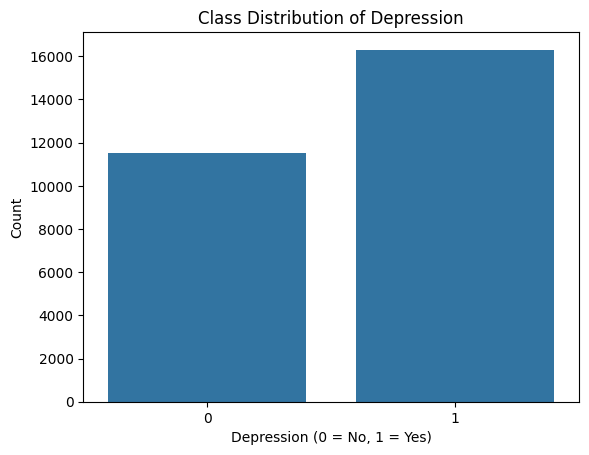

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Depression', data=df)
plt.title("Class Distribution of Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [30]:
# Drop redundant Degree column
df.drop(columns=['Degree'], inplace=True)

# Label encode City
le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

print("Encoded 'City':", dict(zip(le_city.classes_, le_city.transform(le_city.classes_))))


Encoded 'City': {'agra': np.int64(0), 'ahmedabad': np.int64(1), 'bangalore': np.int64(2), 'bhopal': np.int64(3), 'chennai': np.int64(4), 'delhi': np.int64(5), 'faridabad': np.int64(6), 'ghaziabad': np.int64(7), 'hyderabad': np.int64(8), 'indore': np.int64(9), 'jaipur': np.int64(10), 'kalyan': np.int64(11), 'kanpur': np.int64(12), 'kolkata': np.int64(13), 'lucknow': np.int64(14), 'ludhiana': np.int64(15), 'meerut': np.int64(16), 'mumbai': np.int64(17), 'nagpur': np.int64(18), 'nashik': np.int64(19), 'patna': np.int64(20), 'pune': np.int64(21), 'rajkot': np.int64(22), 'srinagar': np.int64(23), 'surat': np.int64(24), 'thane': np.int64(25), 'vadodara': np.int64(26), 'varanasi': np.int64(27), 'vasai-virar': np.int64(28), 'visakhapatnam': np.int64(29)}


In [31]:
# Check column names, types, and unique values
print("Column Summary:\n")
for col in df.columns:
    print(f" {col}")
    print(f"  • Type: {df[col].dtype}")
    print(f"  • Unique values: {df[col].nunique()}")
    print(f"  • Sample: {df[col].unique()[:5]}")
    print("-" * 40)


Column Summary:

 Gender
  • Type: int64
  • Unique values: 2
  • Sample: [1 0]
----------------------------------------
 Age
  • Type: float64
  • Unique values: 34
  • Sample: [33. 24. 31. 28. 25.]
----------------------------------------
 City
  • Type: int64
  • Unique values: 30
  • Sample: [29  2 23 27 10]
----------------------------------------
 Academic Pressure
  • Type: float64
  • Unique values: 6
  • Sample: [5. 2. 3. 4. 1.]
----------------------------------------
 Work Pressure
  • Type: float64
  • Unique values: 3
  • Sample: [0. 5. 2.]
----------------------------------------
 CGPA
  • Type: float64
  • Unique values: 332
  • Sample: [8.97 5.9  7.03 5.59 8.13]
----------------------------------------
 Study Satisfaction
  • Type: float64
  • Unique values: 6
  • Sample: [2. 5. 3. 4. 1.]
----------------------------------------
 Job Satisfaction
  • Type: float64
  • Unique values: 5
  • Sample: [0. 3. 4. 2. 1.]
----------------------------------------
 Sleep Duration


In [32]:
#Scaling
from sklearn.preprocessing import StandardScaler

# Instantiate scaler
scaler = StandardScaler()

# Features to scale
scale_cols = ['Age', 'CGPA', 'Work/Study Hours']

# Apply scaling and update in DataFrame
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Check the result
print("Scaled features preview:")
print(df[scale_cols].head())


Scaled features preview:
        Age      CGPA  Work/Study Hours
0  1.463349  0.893340         -1.121711
1 -0.371103 -1.193883         -1.121711
2  1.055693 -0.425622          0.496808
3  0.444209 -1.404645         -0.851958
4 -0.167275  0.322244         -1.661218


In [33]:
# Define target and features
X = df.drop(columns=['Depression'])
y = df['Depression']

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")


Feature shape: (27842, 15)
Target shape: (27842,)


In [34]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (22273, 15), (22273,)
Test shape: (5569, 15), (5569,)


In [35]:
## Model Comparison
# trained and compared multiple models (SVM, Logistic Regression, Random Forest, KNN). Based on F1 Score and accuracy, Logistic Regression was selected for the final pipeline.


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Models to try
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Dictionary to store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n")
print(results_df.sort_values(by='F1 Score', ascending=False))


Model Evaluation Results:

                     Accuracy  Precision    Recall  F1 Score
SVM                  0.851499   0.857101  0.895738  0.875993
Logistic Regression  0.852038   0.860396  0.892058  0.875941
Random Forest        0.847190   0.859916  0.882858  0.871236
KNN                  0.801041   0.807659  0.866605  0.836095


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Final pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional here, already scaled, but good for future real inputs
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit pipeline on training data
final_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = final_pipeline.predict(X_test)

# Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2308
           1       0.86      0.89      0.88      3261

    accuracy                           0.85      5569
   macro avg       0.85      0.84      0.85      5569
weighted avg       0.85      0.85      0.85      5569

Confusion Matrix:

[[1836  472]
 [ 353 2908]]


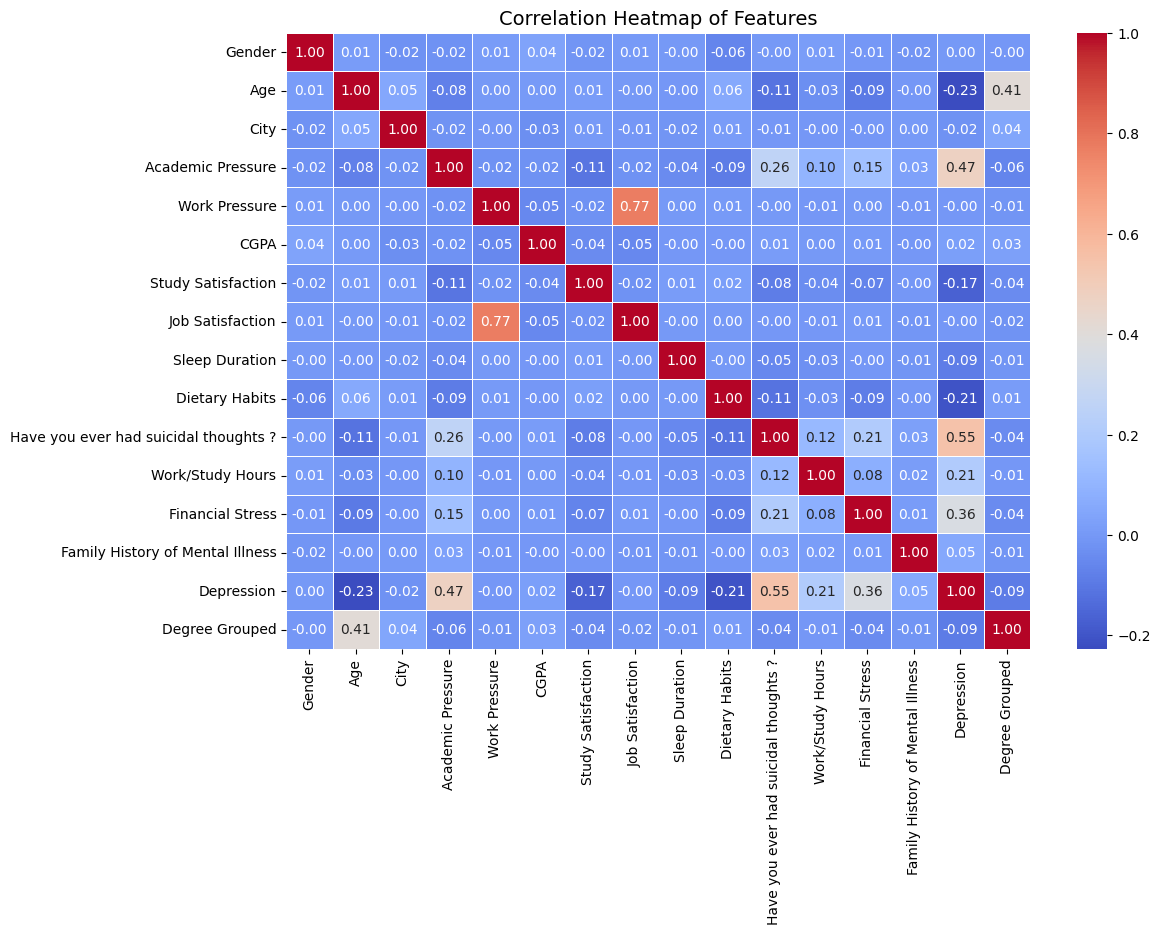

In [37]:
# Correlation heatmap to visualize relationships between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()


<ipython-input-38-c426b7b5e373>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='Blues_d')


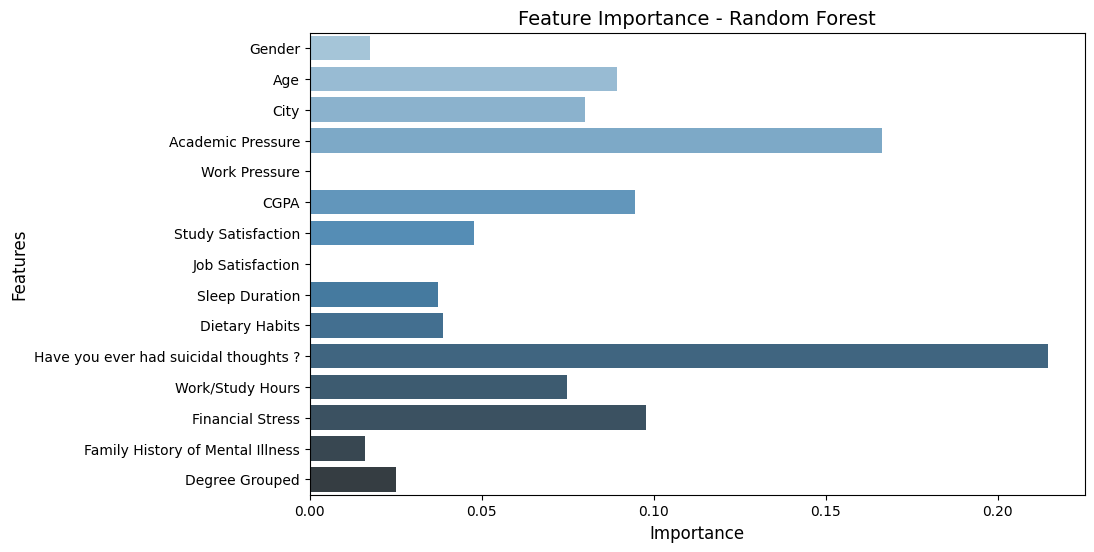

In [38]:
# Feature importance using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Plotting the feature importances
plt.figure(figsize=(10,6))
feature_importances = rf_model.feature_importances_
features = df.drop(columns=['Depression']).columns

sns.barplot(x=feature_importances, y=features, palette='Blues_d')
plt.title('Feature Importance - Random Forest', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()


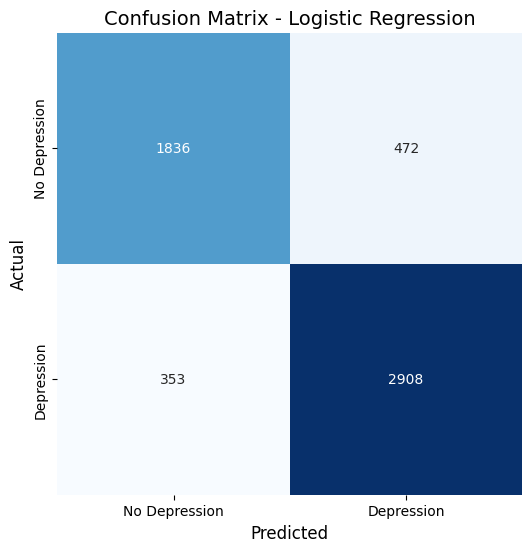

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.title("Confusion Matrix - Logistic Regression", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()


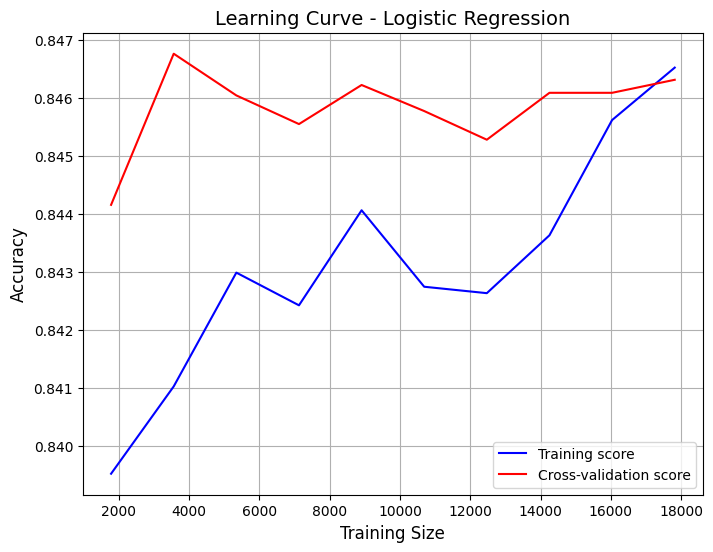

In [40]:
from sklearn.model_selection import learning_curve

# Learning curve for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(
    final_pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plotting the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color='b')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color='r')
plt.title('Learning Curve - Logistic Regression', fontsize=14)
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.show()
